In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.misc import imresize
import time

In [2]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray, interpolation='nearest')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Load and preprocess dataset

In [3]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=0)
faces = dataset.data

In [4]:
faces = dataset.data
d = 32
small_faces = np.zeros((400, d*d))
for i in range(400):
    small_faces[i,:] = imresize(faces[i,:].reshape((64,64)), (d, d)).ravel()
faces = small_faces


n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

Original and normalized faces visualization

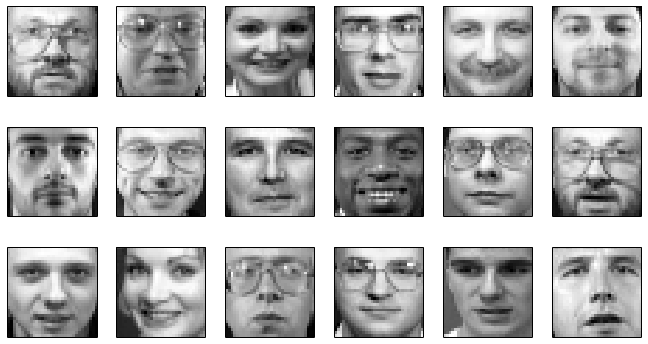

In [5]:
plot_gallery(faces, [""] * faces.shape[0], 32, 32)

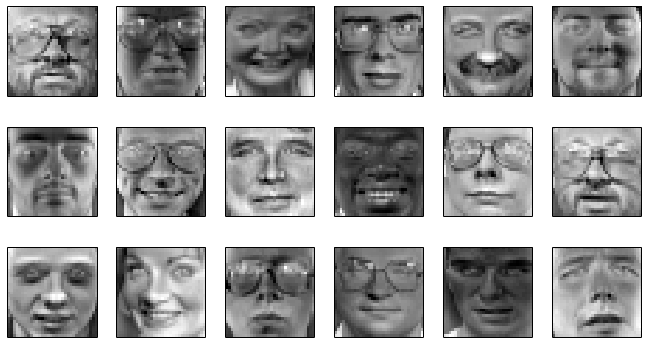

In [6]:
plot_gallery(faces_centered, [""] * faces_centered.shape[0], 32, 32)

Dataset is decomposed via **MiniBatchDictionaryLearning

In [7]:
from sklearn import decomposition
dec = decomposition.MiniBatchDictionaryLearning(n_components=32, alpha=1.0,
                                                  n_iter=100, batch_size=10,
                                                  random_state=0)

In [8]:
t0 = time.time()
dec.fit(faces_centered)
print "elapsed time:", time.time() - t0

elapsed time: 16.2237770557


Dictionary visualization

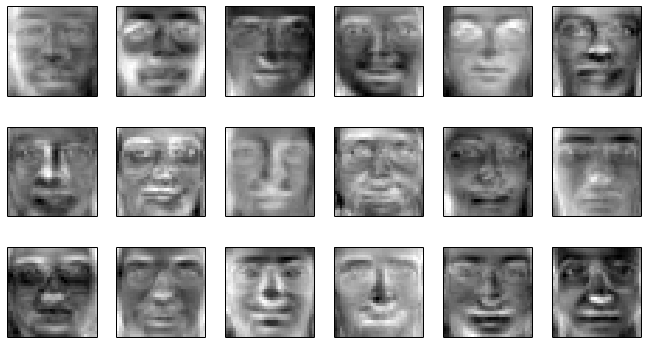

In [9]:
plot_gallery(dec.components_, [""] * dec.components_.shape[0], 32, 32)

Data reconstruction

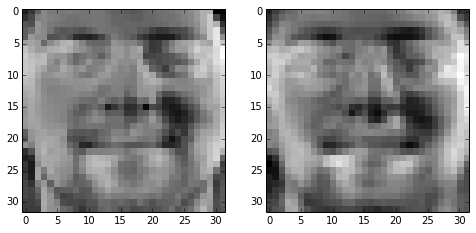

In [10]:
k = 5
img = faces_centered[k].copy()
low = np.min(faces_centered[k])
high = np.max(faces_centered[k])
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img.reshape((32, 32)), cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(1,2,2)
x = dec.transform(img)
y = x.dot(dec.components_)
plt.imshow(y.reshape((32, 32)), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

Inpainting

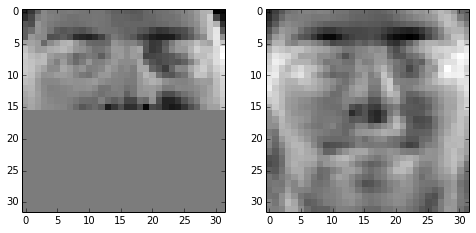

In [11]:
img = faces_centered[k].copy()
img[32*16:] = 0
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img.reshape((32, 32)), cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(1,2,2)
x = dec.transform(img)
y = x.dot(dec.components_)
plt.imshow(y.reshape((32, 32)), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

Unfortunately, obtained codes are not sparse

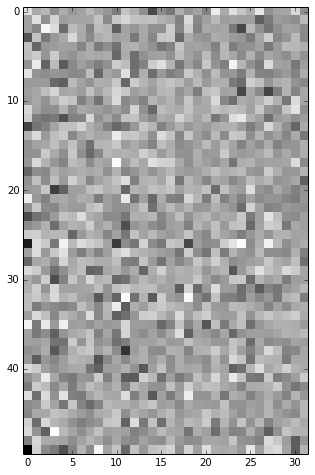

In [12]:
codes = dec.transform(faces_centered)
plt.figure(figsize=(8,8))
plt.imshow(codes[:50,:], cmap=plt.cm.gray, interpolation='nearest')